In [37]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle
import time
import warnings 
warnings.filterwarnings('ignore')

In [3]:
test = pd.read_csv('/Users/theos_abhi/Downloads/Softwares/decoy/decoy 3/MultiModel1/TestFinal.csv')
train = pd.read_csv('/Users/theos_abhi/Downloads/Softwares/decoy/decoy 3/MultiModel1/TrainFinal.csv')

## DATA Preprocessing

In [4]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

label
1    130760
0    130760
Name: count, dtype: int64

In [5]:
train_upsampled

,Unnamed: 0,id,label,tweet
45884,45884,100705,1,hey retard you dont get it those two put ...
129712,129712,154121,1,the graceful slick is non other than an ungra...
19492,19492,19493,1,you might be a libtard if libtard sjw libera...
135847,135847,135711,1,controversial remarks alleged calling faceb...
62372,62372,108421,1,go screw contrary to your recent message ...
...,...,...,...,...
143736,143736,141273,0,section 1b of the gacr states it complies wi...
143737,143737,9372,0,say tim could you take a look at the e...
143739,143739,93553,0,ahcene bendjazia well dont get me started the...
143740,143740,94735,0,no i dont think you mean to be obnoxious i th...


In [6]:
dt_trasformed = train_upsampled[['label', 'tweet']]
y = dt_trasformed.iloc[:, :-1].values
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [7]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [8]:
print(y.shape)

(261520, 2)


In [9]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

hello
hell



In [10]:
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(train_upsampled['tweet']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
x.shape

(261520, 2000)

## Train Test Split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y_hate, test_size = 0.30, random_state = 1)

## KNN

In [13]:
'''classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

start_time = time.time()
classifier_knn.fit(x_train, y_train)
end_time = time.time()'''

"classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)\n\nstart_time = time.time()\nclassifier_knn.fit(x_train, y_train)\nend_time = time.time()"

In [14]:
'''training_time = end_time - start_time
print(f"Training time of KNN: {training_time:.6f} seconds")'''

'training_time = end_time - start_time\nprint(f"Training time of KNN: {training_time:.6f} seconds")'

In [15]:
'''y_pred_knn = classifier_knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()'''

'y_pred_knn = classifier_knn.predict(x_test)\ncm = confusion_matrix(y_test, y_pred_knn)\nprint(cm)\n\ncm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn, labels = [1,0]), display_labels = [True, False])\ncm_display.plot()\nplt.show()'

In [16]:
'''knn_score = accuracy_score(y_test, y_pred_knn)
print('K-Nearest Neighbors Accuracy: ', str(knn_score))
print('F1 score: ', f1_score(y_test, y_pred_knn, labels = [1,0]))'''

"knn_score = accuracy_score(y_test, y_pred_knn)\nprint('K-Nearest Neighbors Accuracy: ', str(knn_score))\nprint('F1 score: ', f1_score(y_test, y_pred_knn, labels = [1,0]))"

## Naive Bayes

In [17]:
classifier_np = GaussianNB()
start_time = time.time()
classifier_np.fit(x_train, y_train)
end_time = time.time()

In [18]:
training_time = end_time - start_time
print(f"Training time of Naive Bayes: {training_time:.6f} seconds")

Training time of Naive Bayes: 8.326367 seconds


[[18011 21485]
 [  675 38285]]


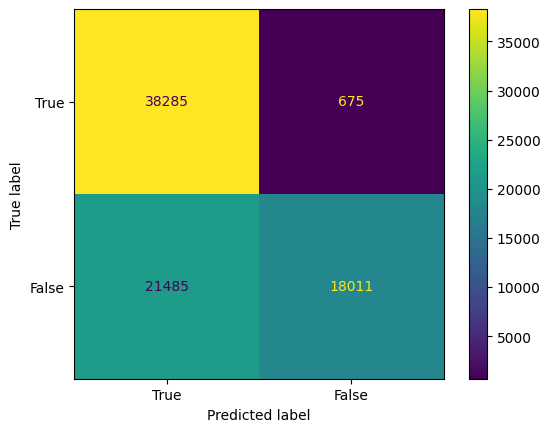

In [19]:
y_pred_np = classifier_np.predict(x_test)
cm = confusion_matrix(y_test, y_pred_np)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_np, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [20]:
np_score = accuracy_score(y_test, y_pred_np)
print('Naive Bayes Accuracy: ', str(np_score))
print('F1 score: ', f1_score(y_test, y_pred_np, labels = [1,0]))

Naive Bayes Accuracy:  0.7175486897114306
F1 score:  0.7755494783753671


## Decision Tree

In [21]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
start_time = time.time()
classifier_dt.fit(x_train, y_train)
end_time = time.time()

In [22]:
training_time = end_time - start_time
print(f"Training time of Decision Tree: {training_time:.6f} seconds")

Training time of Decision Tree: 141.628772 seconds


[[39296   200]
 [ 2767 36193]]


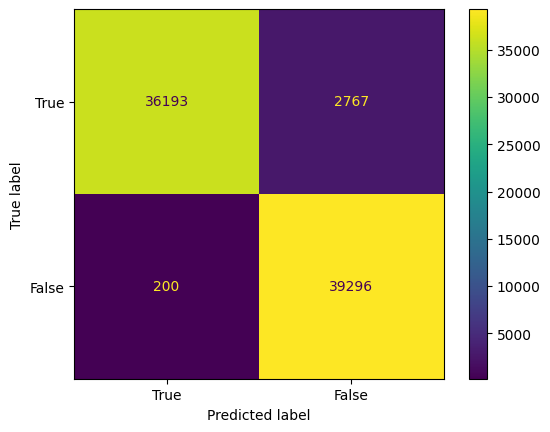

In [23]:
y_pred_dt = classifier_dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_dt, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()


In [24]:
dt_score = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy: ', str(dt_score))
print('F1 score: ', f1_score(y_test, y_pred_dt, labels = [1,0]))

Decision Tree Accuracy:  0.962182624655858
F1 score:  0.9606253234774992


## Logistic Regression

In [25]:
classifier_lr = LogisticRegression(random_state = 0)
start_time = time.time()
classifier_lr.fit(x_train, y_train)
end_time = time.time()

In [26]:
training_time = end_time - start_time
print(f"Training time of Logistic Regression: {training_time:.6f} seconds")

Training time of Logistic Regression: 200.941783 seconds


[[33406  6090]
 [ 3526 35434]]


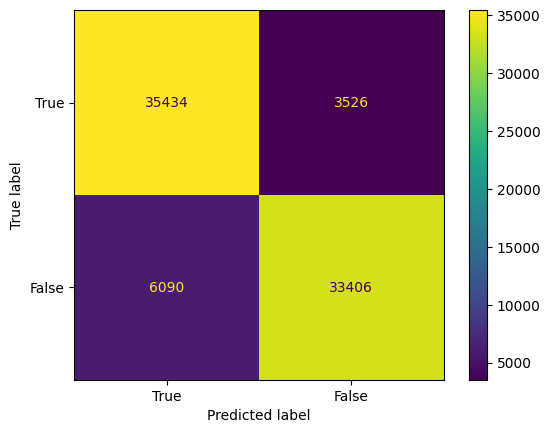

In [28]:
y_pred_lr=classifier_lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lr, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [29]:
lr_score = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Accuracy: ',str(lr_score))
print('F1 score: ', f1_score(y_test, y_pred_lr, labels = [1,0]))

Logistic Regression Accuracy:  0.8774344855715306
F1 score:  0.8805228368371353


## K-Nearest Neighbour

In [30]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
start_time = time.time()
classifier_knn.fit(x_train, y_train)
end_time = time.time()

In [32]:
training_time = end_time - start_time
print(f"Training time of KNN: {training_time:.6f} seconds")

Training time of KNN: 0.021976 seconds


[[38910   586]
 [ 7470 31490]]


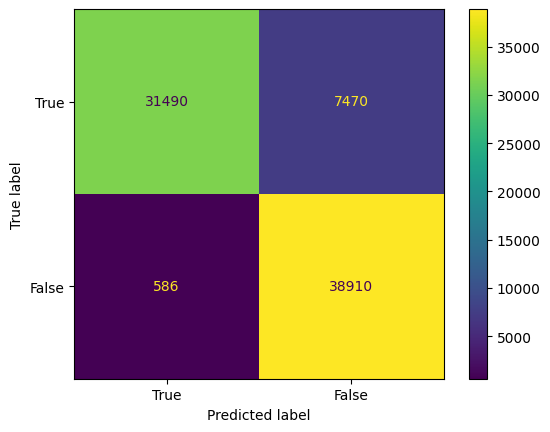

In [33]:
y_pred_knn = classifier_knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [34]:
knn_score = accuracy_score(y_test, y_pred_knn)
print('K-Nearest Neighbors Accuracy: ', str(knn_score))
print('F1 score: ', f1_score(y_test, y_pred_knn, labels = [1,0]))

K-Nearest Neighbors Accuracy:  0.8973182420719894
F1 score:  0.8865927135536911


## Random Forest

In [38]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
start_time = time.time()
classifier_rf.fit(x_train, y_train)
end_time = time.time()

In [39]:
training_time = end_time - start_time
print(f"Training time of Random Forest: {training_time:.6f} seconds")

Training time of Random Forest: 44.237562 seconds


[[39306   190]
 [ 1246 37714]]


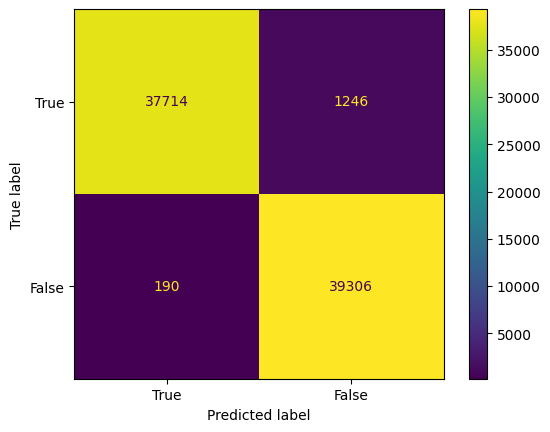

In [40]:
y_pred_rf = classifier_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [41]:
rf_score = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy: ', str(rf_score))
print('F1 score: ', f1_score(y_test, y_pred_rf, labels = [1,0]))

Random Forest Accuracy:  0.9816967472213725
F1 score:  0.9813176519567026
